In [1]:
!pip install scikit-learn numpy matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [3]:
data = load_breast_cancer()
X = data.data
y = data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel Accuracy:",
      accuracy_score(y_test, y_pred_linear))

Linear Kernel Accuracy: 0.956140350877193


In [7]:
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("RBF Kernel Accuracy:",
      accuracy_score(y_test, y_pred_rbf))

RBF Kernel Accuracy: 0.9824561403508771


In [8]:
scores = cross_val_score(svm_rbf, X, y, cv=5)
print("Cross Validation Accuracy:", scores.mean())

Cross Validation Accuracy: 0.9121720229777983


In [9]:
svm_tuned = SVC(kernel='rbf', C=10, gamma=0.01)
svm_tuned.fit(X_train, y_train)

print("Tuned Accuracy:",
      accuracy_score(y_test, svm_tuned.predict(X_test)))

Tuned Accuracy: 0.9824561403508771


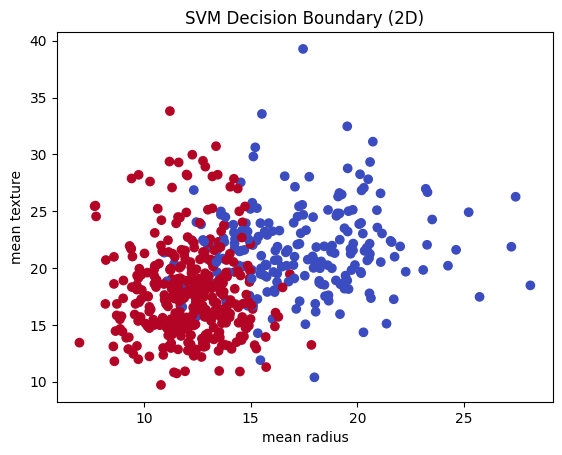

In [10]:
X_2d = X[:, :2]

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_2d, y, test_size=0.2, random_state=42
)

svm_2d = SVC(kernel='linear')
svm_2d.fit(X_train2, y_train2)

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='coolwarm')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("SVM Decision Boundary (2D)")
plt.show()